In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random_hyperplanes import iforest, planes, synthetic_data, simulations

In [2]:
n = 1200
contamination = 0.015
n_anon = int(n * contamination)
p = 2
noisy_p = 28

cov_1 = np.array([
    [0.5, 0.0],
    [0.0, 10.0]
])

cov_2 = np.array([
    [0.5, 0.0],
    [0.0, 10.0]
])


cov_3 = np.array([
    [10.0, 0.0],
    [0.0, 0.5],
])

mean_1 = [-7.0,  0.0]
mean_2 = [ 7.0,  0.0]
mean_3 = [ 0.0, -7.0]

cov_anon = np.array([
    [0.5, 0.0],
    [0.0, 1.5],
])

mean_anon = [0.0, 5.0]

covs  = [cov_1, cov_2, cov_3]
means = [mean_1, mean_2, mean_3]

size_cluster = int(n/3)
n_points = [size_cluster, size_cluster, size_cluster]

covs_anon = [cov_anon]
means_anon = [mean_anon]
n_anomalies = [n_anon]

X_noise = np.random.randn(n, noisy_p)
X_anon_noise = np.random.randn(n_anon, noisy_p)

In [3]:
X = synthetic_data.gen_correlated_clusters(n_points=n_points, covs=covs, means=means)
X_anon = synthetic_data.gen_correlated_clusters(n_points=n_anomalies, covs=covs_anon, means=means_anon)

X += np.random.randn(n, p)
X_anon += np.random.randn(n_anon, p)

X = np.column_stack([X, X_noise])
X_anon = np.column_stack([X_anon, X_anon_noise])

print(X_anon.shape, X.shape)

(18, 30) (1200, 30)


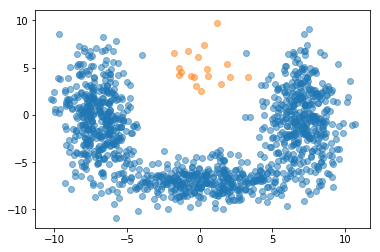

In [4]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.scatter(X_anon[:, 0], X_anon[:, 1], alpha=0.5)
plt.show()

Running iteration 1


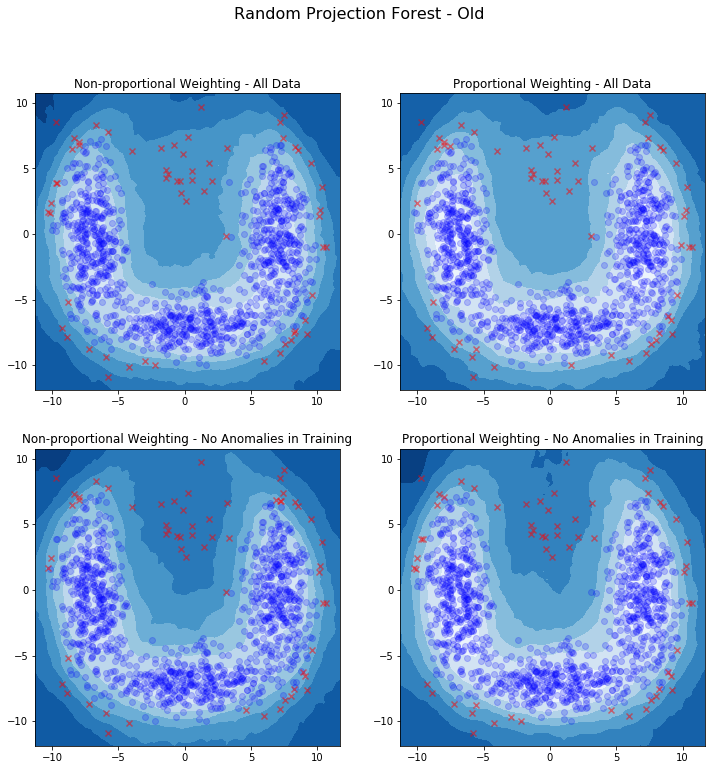

Running iteration 2


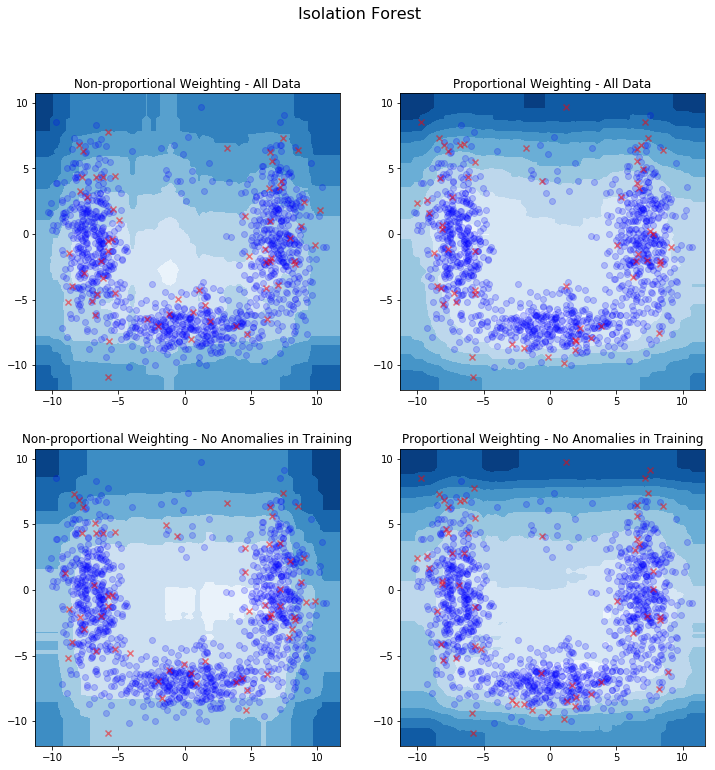

Done!


In [5]:
simulations.run_comparison_simul(
    X=X, X_anon=X_anon, classifiers=[planes.RandomProjectionForestOld, iforest.IsolationForest], 
    n_estimators=100, score_at=95.0)

In [6]:
X_all = np.row_stack([X, X_anon])
np.random.shuffle(X_all)

In [ ]:
rhp = planes.RandomProjectionForestOld(n_estimators=100).fit(X_all)
print(np.mean(rhp.get_depths(X)), np.mean(rhp.get_depths(X_anon)))

17.98295 12.0516666667


In [ ]:
rcf = iforest.IsolationForest(n_estimators=100, method='rcf').fit(X_all)
print(np.mean(rcf.get_depths(X)), np.mean(rcf.get_depths(X_anon)))

In [ ]:
X_all.shape